import pandas as pd

celiac_df = pd.read_csv("celiac_disease_lab_data.csv")
infant_df = pd.read_csv("Weights_heights_of_Infants_with_respect_to_method_of_feeding.csv")
monkeypox_df = pd.read_csv("Monkeypox_Research_Summary_Data.csv")

print("Loaded:", celiac_df.shape, infant_df.shape, monkeypox_df.shape)


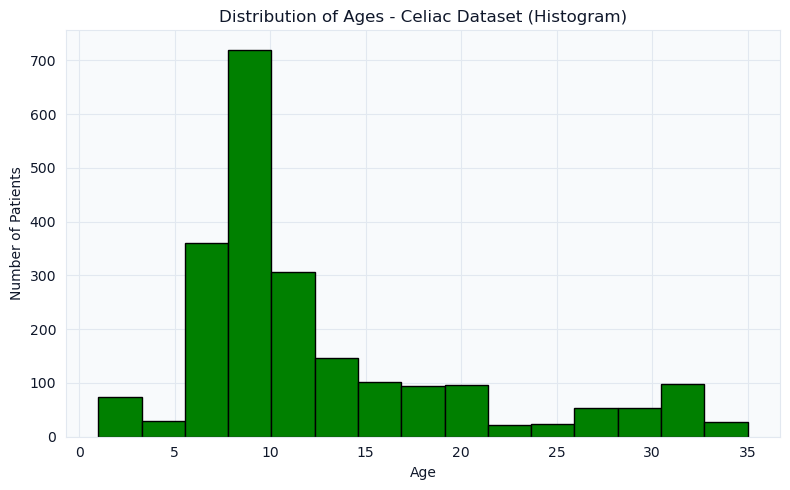

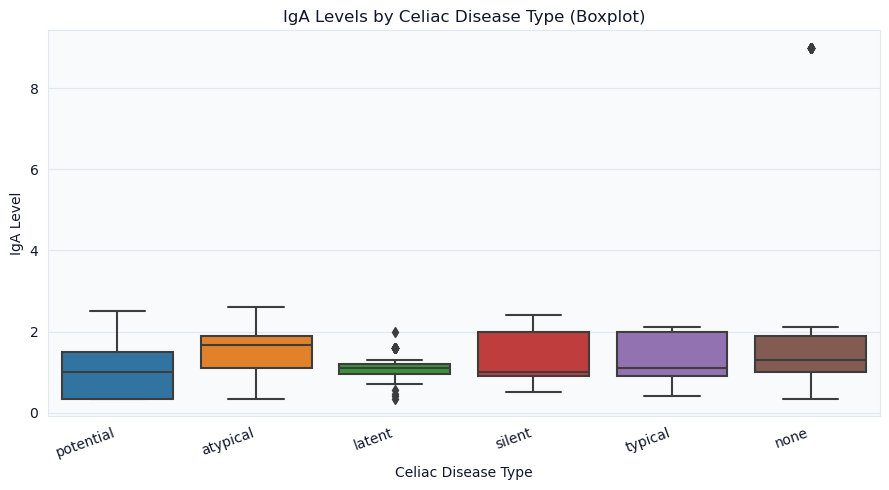

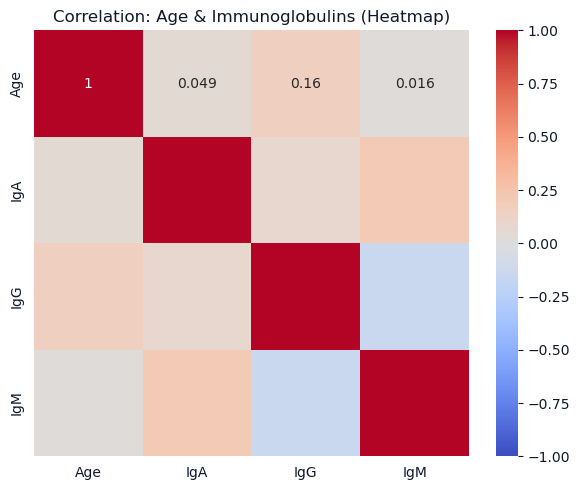

In [2]:
# Celiac dataset: histogram + boxplot + heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({
    "figure.facecolor": "#ffffff",
    "axes.facecolor": "#f8fafc",
    "axes.edgecolor": "#e2e8f0",
    "grid.color": "#e2e8f0",
    "text.color": "#0f172a",
    "axes.labelcolor": "#0f172a",
    "xtick.color": "#0f172a",
    "ytick.color": "#0f172a",})

# Histogram of Age
plt.figure(figsize=(8, 5))
celiac_df["Age"].hist(bins=15, color="green", edgecolor="black")
plt.title("Distribution of Ages - Celiac Dataset (Histogram)")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.savefig("celiac_age_histogram.png", dpi=150)
plt.show()

# Boxplot of immunoglobulins by cd_type
plt.figure(figsize=(9, 5))
sns.boxplot(data=celiac_df, x="cd_type", y="IgA")
plt.title("IgA Levels by Celiac Disease Type (Boxplot)")
plt.xlabel("Celiac Disease Type")
plt.ylabel("IgA Level")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig("celiac_IgA_box.png", dpi=150)
plt.show()

# Heatmap: Age and immunoglobulins
num_cols = ["Age", "IgA", "IgG", "IgM"]
corr = celiac_df[num_cols].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Age & Immunoglobulins (Heatmap)")
plt.tight_layout()
plt.savefig("celiac_corr_heatmap.png", dpi=150)
plt.show()


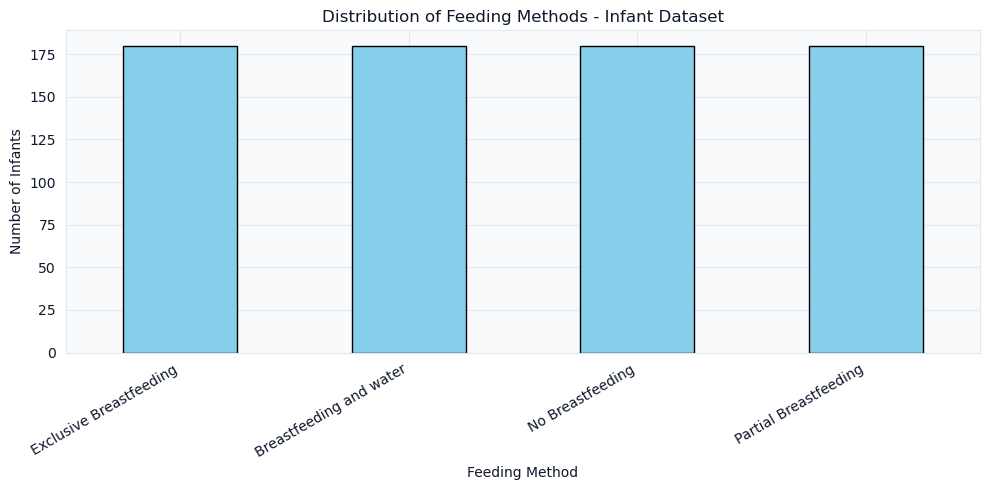

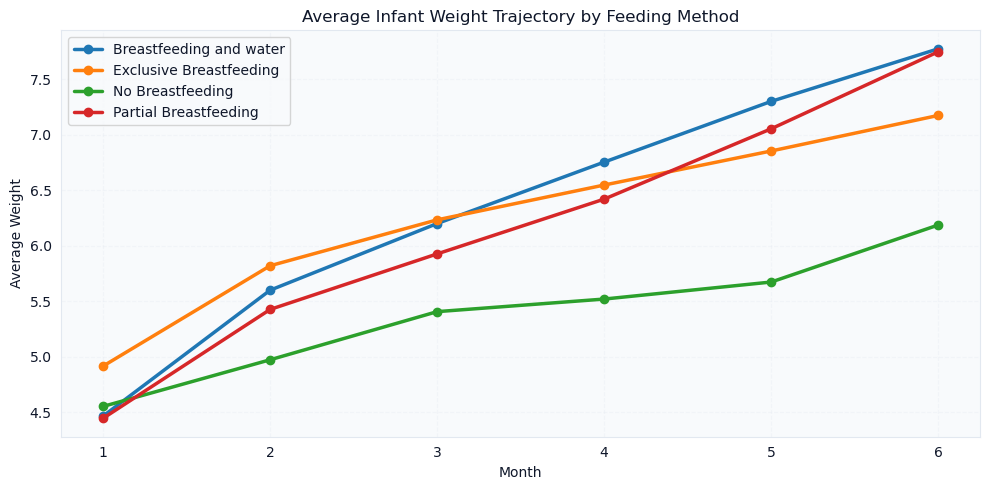

In [12]:
# Infant dataset: bar + line (time series by month)

# Bar chart of feeding methods
plt.figure(figsize=(10, 5))
infant_df["Breastfeeding Partern"].value_counts().plot(
    kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of Feeding Methods - Infant Dataset")
plt.xlabel("Feeding Method")
plt.ylabel("Number of Infants")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("infant_feeding_bar.png", dpi=150)
plt.show()

# Weight trajectory by month and feeding method
infant_df["Month_num"] = infant_df["Month"].str.extract(r"(\d+)").astype(int)

avg_weight = (
    infant_df.groupby(["Month_num", "Breastfeeding Partern"])["Weight"]
    .mean()
    .reset_index())

plt.figure(figsize=(10, 5))
for method, group in avg_weight.groupby("Breastfeeding Partern"):
    plt.plot(group["Month_num"], group["Weight"],
             marker="o", linewidth=2.5, label=method)
plt.title("Average Infant Weight Trajectory by Feeding Method")
plt.xlabel("Month")
plt.ylabel("Average Weight")
plt.legend()
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.savefig("infant_weight_trajectory.png", dpi=150)
plt.show()


/tmp/ipykernel_1234/514546872.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


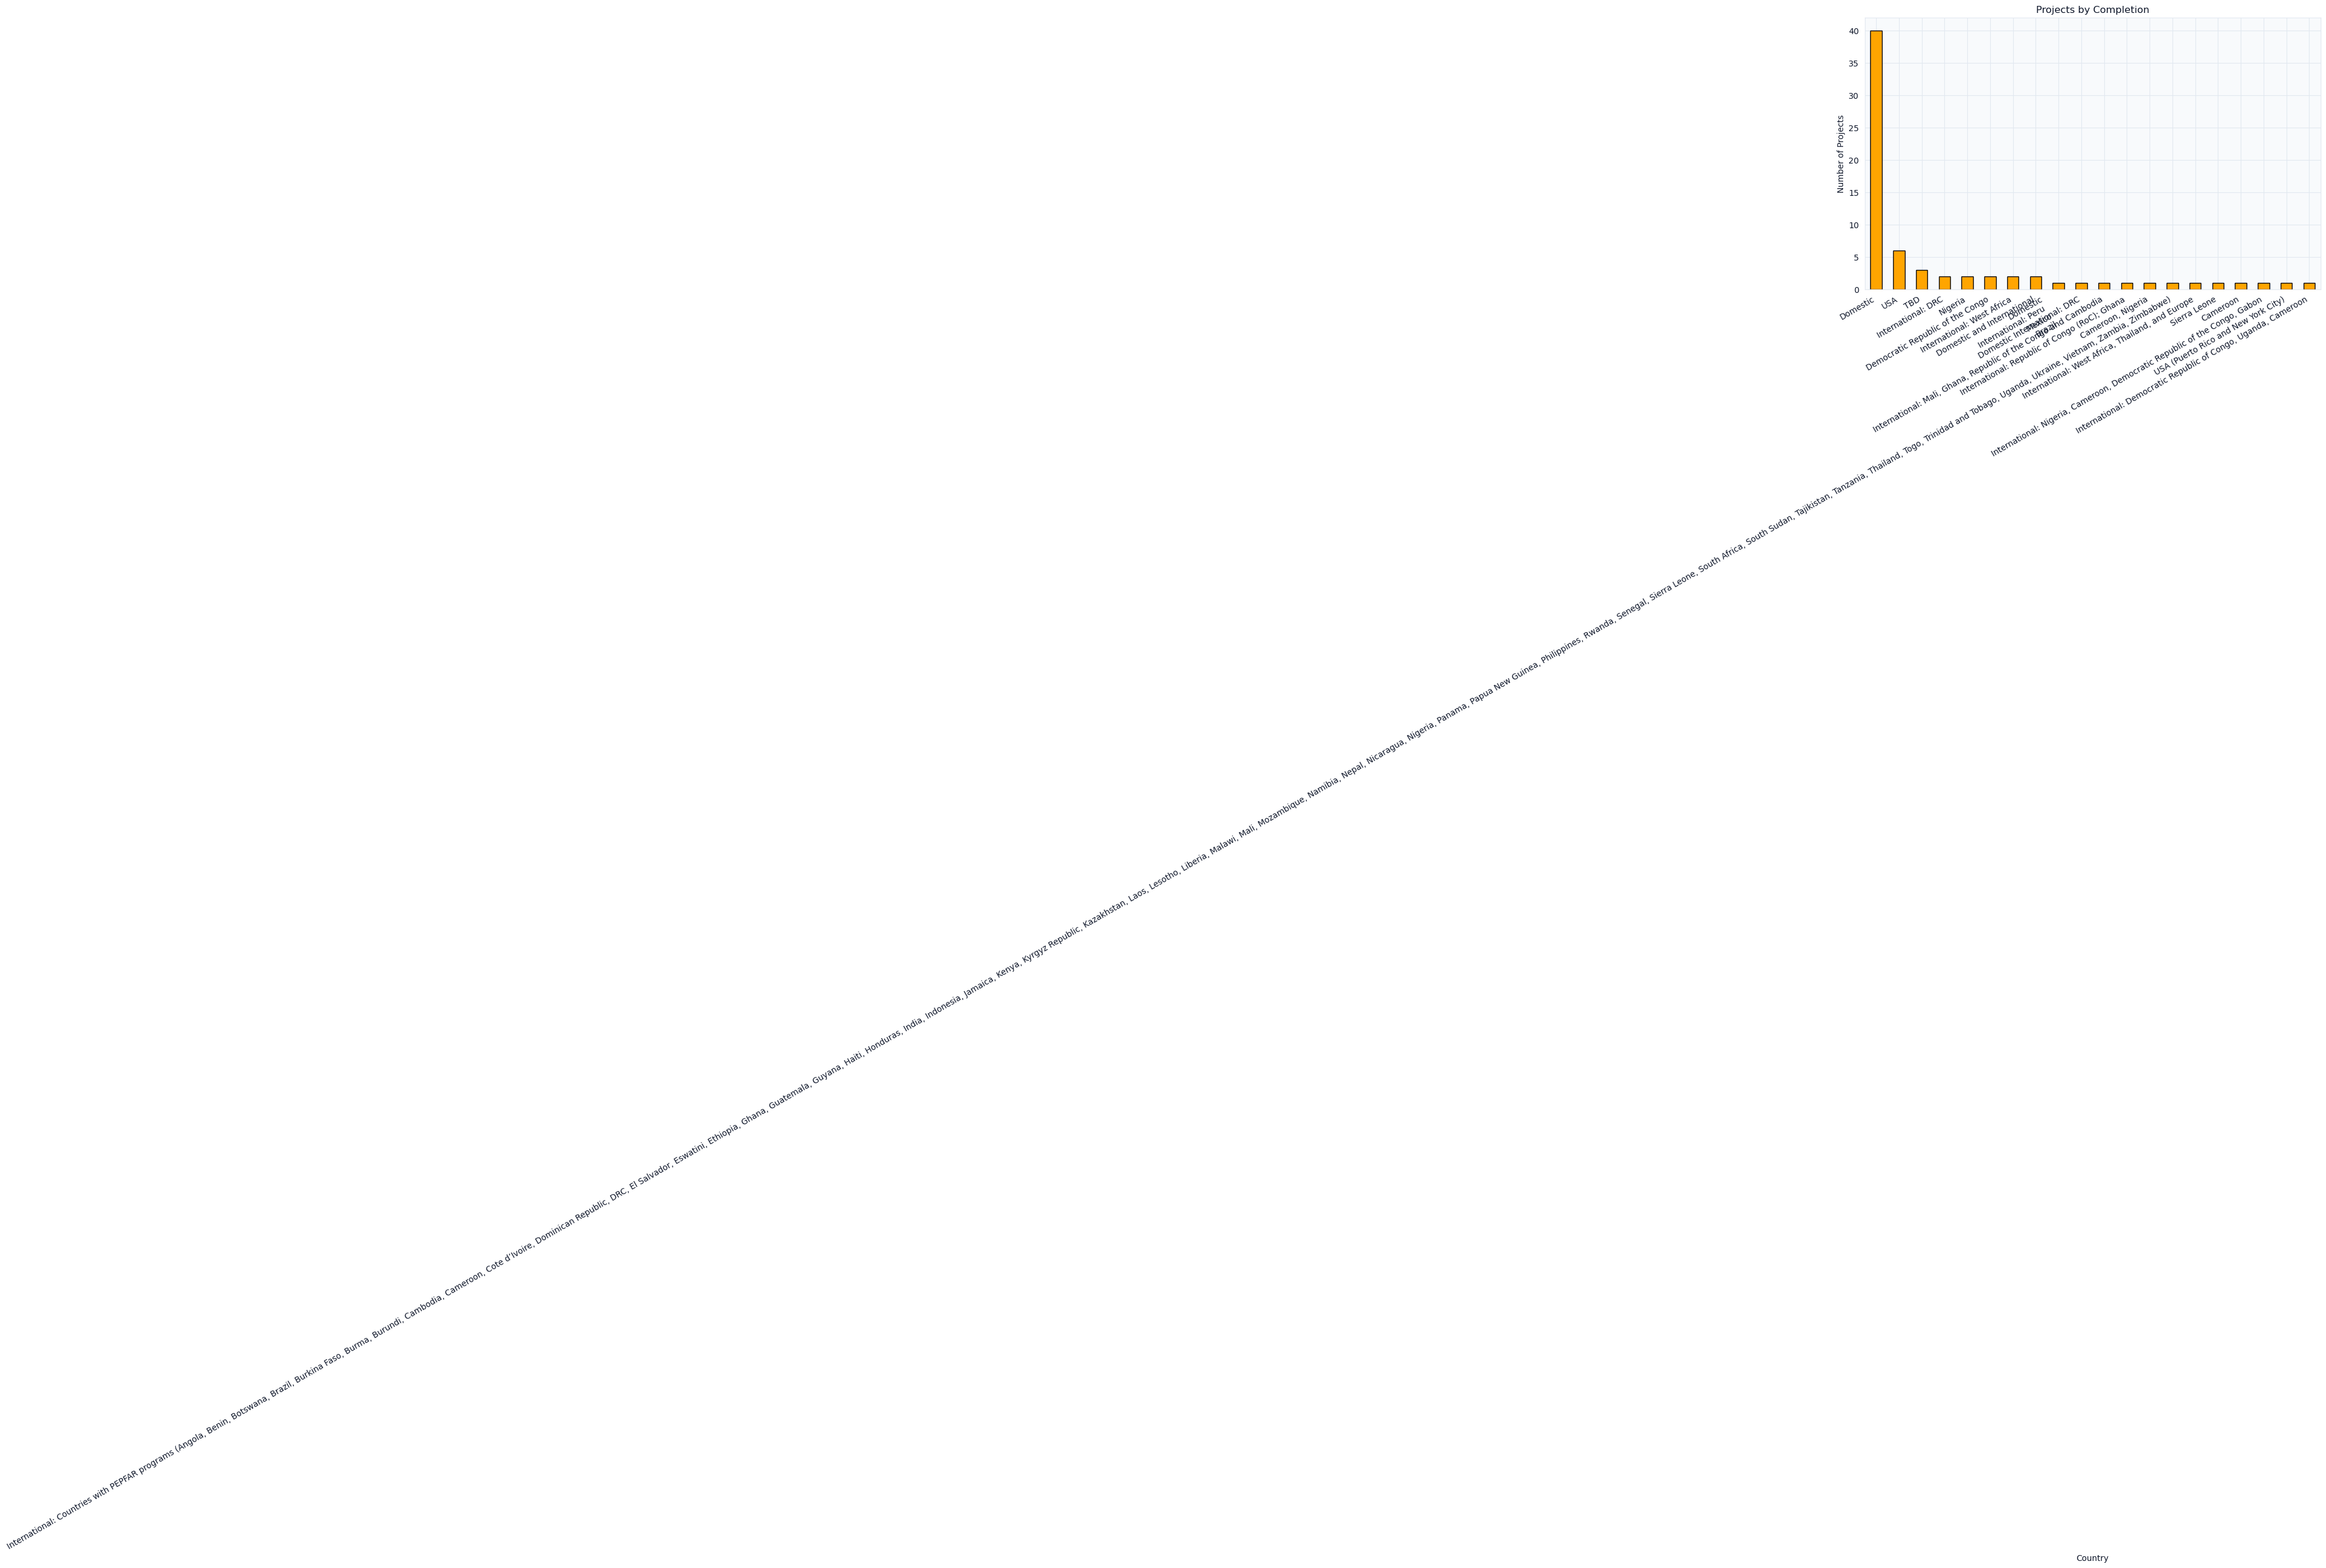

/tmp/ipykernel_1234/514546872.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


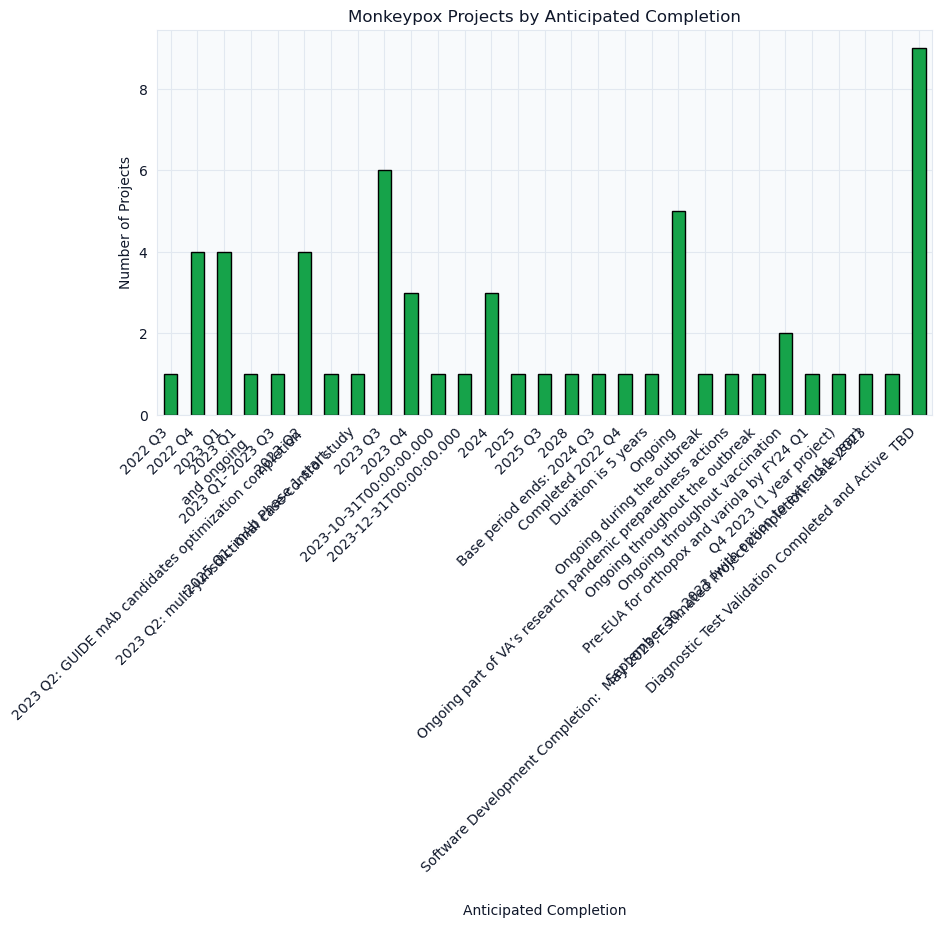

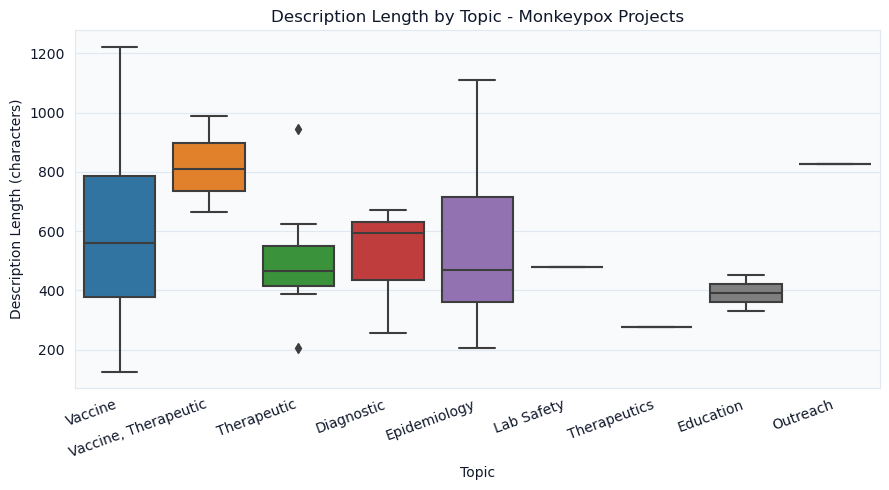

In [26]:
# Monkeypox dataset: bar plot + “time” bar + boxplot

monkeypox_df = monkeypox_df.rename(columns={
    "Country(ies) in which research is/will be conducted": "Country",
    "Anticipated Completion": "Completion"})

# SHORT COUNTRY NAMES FOR X-AXIS
country_map = {
    "Domestic    ": "Domestic",
    "Domestic": "Domestic",
    "USA    ": "USA",
    "USA": "USA",
    "Global    ": "Global",
    "Global": "Global"}

monkeypox_df["Country_short"] = monkeypox_df["Country"].replace(country_map)

# Bar: number of projects by Country (short names)
plt.figure(figsize=(10, 6))
monkeypox_df["Country_short"].value_counts().plot(
    kind="bar", color="orange", edgecolor="black")

plt.title("Number of Monkeypox Research Projects by Country")
plt.xlabel("Country")
plt.ylabel("Number of Projects")
plt.xticks(rotation=0)
plt.title("Projects by Completion")  
plt.xticks(rotation=30, ha="right")

#plt.tight_layout()
plt.savefig("monkeypox_by_completion.png", dpi=150, bbox_inches="tight")
plt.show()


# Bar (time-series style): projects by Completion value
plt.figure(figsize=(10, 5))
monkeypox_df["Completion"].value_counts().sort_index().plot(
    kind="bar", color="#16a34a", edgecolor="black")

plt.title("Monkeypox Projects by Anticipated Completion")
plt.xlabel("Anticipated Completion")
plt.ylabel("Number of Projects")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("monkeypox_by_completion.png", dpi=150)
plt.show()

# Boxplot: length of Brief Description text by Topic
monkeypox_df["Desc_len"] = monkeypox_df["Brief Description"].str.len()

plt.figure(figsize=(9, 5))
sns.boxplot(data=monkeypox_df, x="Topic", y="Desc_len")
plt.title("Description Length by Topic - Monkeypox Projects")
plt.xlabel("Topic")
plt.ylabel("Description Length (characters)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig("monkeypox_desclen_box.png", dpi=150)
plt.show()


In [14]:
# =========================================================
# CELIAC DATASET PLOTS
# =========================================================
plt.figure(figsize=(8, 5))
celiac_df["Age"].hist(bins=15, color="green", edgecolor="black")
plt.title("Distribution of Ages - Celiac Dataset")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.savefig("celiac_age_histogram.png", dpi=150)
plt.close()

Joined infant table (first 4 rows):


,S/n_left,Weight_left,Height_left,Month_left,Breastfeeding Partern_left,Month_num,S/n_right,Weight_right,Height_right,Month_right,Breastfeeding Partern_right
0,1,4.0,17.0,Month 1,Exclusive Breastfeeding,1,1,4.0,17.0,Month 1,Exclusive Breastfeeding
1,1,4.0,17.0,Month 1,Exclusive Breastfeeding,1,2,4.9,18.5,Month 1,Exclusive Breastfeeding
2,1,4.0,17.0,Month 1,Exclusive Breastfeeding,1,3,5.2,16.0,Month 1,Exclusive Breastfeeding
3,1,4.0,17.0,Month 1,Exclusive Breastfeeding,1,4,4.5,18.0,Month 1,Exclusive Breastfeeding
